In [27]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Dense, Flatten, LSTM, Lambda
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
_SEED = 1234

_PATH_BASE = os.path.join(os.getcwd(), 'data')

MAX_EPOCHS = 10

In [3]:
X_data = np.load(os.path.join(_PATH_BASE, 'b_daily_feature.npy'))
y_data = np.load(os.path.join(_PATH_BASE, 'b_daily_label.npy'))

In [4]:
X_train, X_test, y_train, y_test = \
    train_test_split(X_data, y_data, test_size=0.2, random_state=_SEED)

#### CNN

In [5]:
model_cnn = tf.keras.Sequential([
    Conv1D(256, 3, activation='relu', input_shape=X_train.shape[1:]), 
    Conv1D(128, 3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

2023-08-31 21:48:44.573710: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-31 21:48:44.580873: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-31 21:48:44.581112: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

In [7]:
model_cnn.fit(
    X_train, y_train,
    epochs=MAX_EPOCHS,
    validation_split=0.2,
    # callbacks=[early_stopping]
)

Epoch 1/10


2023-08-31 21:48:46.142123: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-08-31 21:48:46.554018: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-31 21:48:46.612842: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff784003640 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-31 21:48:46.612864: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2023-08-31 21:48:46.617090: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-31 21:48:46.672643: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-31 21:48:46.716750: I ./tensorflow/compiler/jit/device_comp

19/19 [==============================] - 2s 15ms/step - loss: 0.9528 - mean_absolute_error: 0.7168 - val_loss: 0.9360 - val_mean_absolute_error: 0.6776
Epoch 2/10
19/19 [==============================] - 0s 4ms/step - loss: 0.7071 - mean_absolute_error: 0.5926 - val_loss: 0.9148 - val_mean_absolute_error: 0.6006
Epoch 3/10
19/19 [==============================] - 0s 4ms/step - loss: 0.5703 - mean_absolute_error: 0.5303 - val_loss: 0.8875 - val_mean_absolute_error: 0.6606
Epoch 4/10
19/19 [==============================] - 0s 4ms/step - loss: 0.4755 - mean_absolute_error: 0.4910 - val_loss: 0.9406 - val_mean_absolute_error: 0.6370
Epoch 5/10
19/19 [==============================] - 0s 4ms/step - loss: 0.4274 - mean_absolute_error: 0.4685 - val_loss: 0.9296 - val_mean_absolute_error: 0.6838
Epoch 6/10
19/19 [==============================] - 0s 5ms/step - loss: 0.3578 - mean_absolute_error: 0.4299 - val_loss: 0.8964 - val_mean_absolute_error: 0.6261
Epoch 7/10
19/19 [====================

In [8]:
pred_cnn = model_cnn.predict(X_test).reshape(-1)

6/6 [==============================] - 0s 7ms/step


In [9]:
pred_cnn_train = model_cnn.predict(X_train).reshape(-1)

24/24 [==============================] - 0s 2ms/step


In [10]:
model_lstm = tf.keras.Sequential([
    LSTM(32, activation='relu', return_sequences=False),
    Dense(1)
])
model_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

In [11]:
model_lstm.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
19/19 [==============================] - 1s 15ms/step - loss: 0.9968 - mean_absolute_error: 0.7429 - val_loss: 0.8779 - val_mean_absolute_error: 0.6804
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.8833 - mean_absolute_error: 0.6819 - val_loss: 0.8339 - val_mean_absolute_error: 0.6457
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 0.8402 - mean_absolute_error: 0.6436 - val_loss: 0.7988 - val_mean_absolute_error: 0.6193
Epoch 4/100
19/19 [==============================] - 0s 8ms/step - loss: 0.8170 - mean_absolute_error: 0.6371 - val_loss: 0.7780 - val_mean_absolute_error: 0.6127
Epoch 5/100
19/19 [==============================] - 0s 8ms/step - loss: 0.7870 - mean_absolute_error: 0.6098 - val_loss: 0.7570 - val_mean_absolute_error: 0.5983
Epoch 6/100
19/19 [==============================] - 0s 9ms/step - loss: 0.7674 - mean_absolute_error: 0.6118 - val_loss: 0.7414 - val_mean_absolute_error: 0.5969
Epoch 7/100
19/19 [==

In [12]:
pred_lstm = model_lstm.predict(X_test).reshape(-1)

6/6 [==============================] - 0s 2ms/step


In [13]:
pred_lstm_t = model_lstm.predict(X_train).reshape(-1)

24/24 [==============================] - 0s 2ms/step


In [14]:
len(y_test)

185

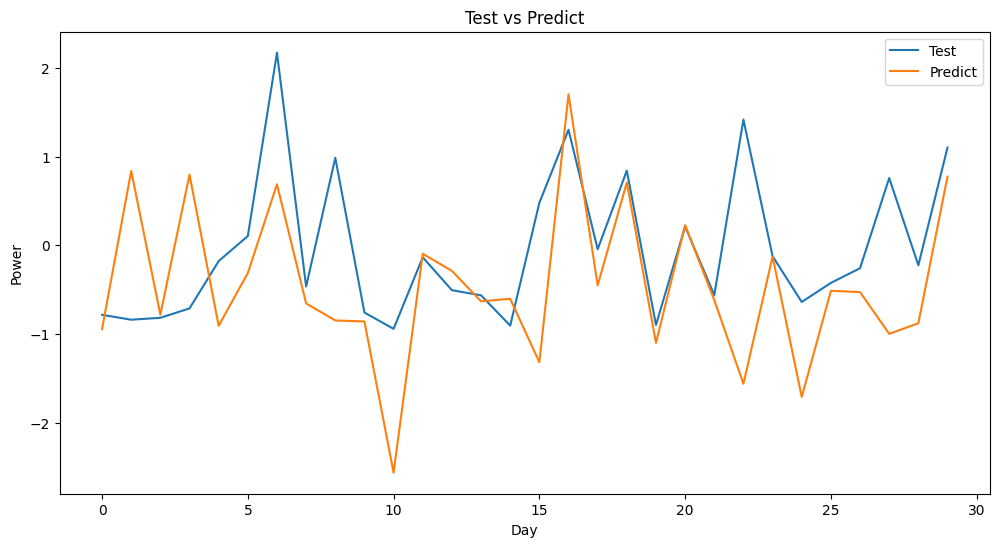

In [15]:
plt.figure(figsize=(12,6))
plt_size = 30

plt.plot(
    np.arange(len(y_test))[:plt_size], 
    y_test[:plt_size],
    label='Test'
)
plt.plot(
    np.arange(len(y_test))[:plt_size], 
    pred_lstm[:plt_size],
    label='Predict'
)
plt.xlabel('Day')
plt.ylabel('Power')
plt.title('Test vs Predict')
plt.legend()
plt.show()

In [22]:
model_lstm2 = tf.keras.Sequential([
    Conv1D(32, 2, padding='valid', activation='relu', input_shape=X_train.shape[1:]),
    LSTM(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])
model_lstm2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

In [23]:
model_lstm2.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
19/19 [==============================] - 2s 18ms/step - loss: 1.0006 - mean_absolute_error: 0.7713 - val_loss: 0.8494 - val_mean_absolute_error: 0.6715
Epoch 2/50
19/19 [==============================] - 0s 10ms/step - loss: 0.8862 - mean_absolute_error: 0.6807 - val_loss: 0.8446 - val_mean_absolute_error: 0.6530
Epoch 3/50
19/19 [==============================] - 0s 10ms/step - loss: 0.8265 - mean_absolute_error: 0.6446 - val_loss: 0.8131 - val_mean_absolute_error: 0.6252
Epoch 4/50
19/19 [==============================] - 0s 9ms/step - loss: 0.7810 - mean_absolute_error: 0.6199 - val_loss: 0.7686 - val_mean_absolute_error: 0.6168
Epoch 5/50
19/19 [==============================] - 0s 9ms/step - loss: 0.7292 - mean_absolute_error: 0.5982 - val_loss: 0.7594 - val_mean_absolute_error: 0.6022
Epoch 6/50
19/19 [==============================] - 0s 10ms/step - loss: 0.6881 - mean_absolute_error: 0.5736 - val_loss: 0.7492 - val_mean_absolute_error: 0.6033
Epoch 7/50
19/19 [======

In [24]:
pred_lstm2 = model_lstm2.predict(X_test).reshape(-1)

6/6 [==============================] - 0s 5ms/step


In [30]:
def user_mape(y_test, pred):
    # 예측대상(test_y)값이 0인 경우를 대비해, 
    # 0이 아닌 아주 작은수를 더해 MAPE값을 구함
    epsilon = 1e-10
    
    abs_err = np.abs(y_test - pred)
    y_test = y_test + epsilon
        
    pct_err = np.where(abs_err == 0, 0, abs_err / y_test * 100)

    # for i in range(len(pct_err)):
    #     if pct_err[i] > 100:
    #         print(y_test[i], pred[i], pct_err[i])
    pct_err = np.minimum(pct_err, 100)
    
    return np.mean(pct_err)

def regression_evaluation(y_test, pred, verbose=1):
    # 모든값을 소숫점 5자리에서 반올림(np 자체의 버그인지 일단 해결하기 위함)
    y = np.round(y_test, decimals=5)
    p = np.round(pred, decimals=5)
    
    mse = mean_squared_error(y, p)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, p)
    r2score = r2_score(y, p)
    mape = mean_absolute_percentage_error(y, p)
    mape2 = user_mape(y, p)
    
    if verbose != 0:
        print(
            f'R2_SCORE: {r2score:.6f}, MAPE2: {mape2:.6f}, '
            f'MAPE: {mape:.6f}\nMSE: {mse:.6f}, '
            f'MAE: {mae:.6f}, RMSE: {rmse:.6f}'
        )
        
    return mse, rmse, mae, mape, mape2

In [31]:
_ = regression_evaluation(y_test, pred_lstm2)

R2_SCORE: 0.134867, MAPE2: -67.357293, MAPE: 1.638471
MSE: 0.879620, MAE: 0.616516, RMSE: 0.937881
